In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time

In [3]:
from runner import Runner

In [4]:
R = Runner()

*** GP2 ***
Working directory: /tmp/tmp6z4_tq8nGP2


In [5]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/masks.npy')

In [6]:
#
# In this experiment, we are using 1000 images for GP2
# with a repository of 9000 images to fillup all relabeled
# datapoints.
#
R.setup_data(images, masks)

In [7]:
RUNS = 5

In [8]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    R.find_machine_labels()
    R.relabel()
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Model saved to /tmp/tmp6z4_tq8nGP2/unet_0.model
History saved to /tmp/tmp6z4_tq8nGP2/history_0.pickle
Testing the classifier...
8/8 [==============================] - 1s 99ms/step - loss: 1.2019 - dice_coeff: 0.3153
Model saved to /tmp/tmp6z4_tq8nGP2/cnnd_0.model
History saved to /tmp/tmp6z4_tq8nGP2/cnnd_history_0.pickle
Testing the discriminator...
4/4 [==============================] - 0s 16ms/step - loss: 4.1037 - accuracy: 0.4700
Found 91 machine labels.
Removed: 26 Filled: 26
TOOK 479.65069365501404 seconds
***
RUN: 1
Model saved to /tmp/tmp6z4_tq8nGP2/unet_1.model
History saved to /tmp/tmp6z4_tq8nGP2/history_1.pickle
Testing the classifier...
8/8 [==============================] - 1s 98ms/step - loss: 1.1086 - dice_coeff: 0.3401
Testing the discriminator...
4/4 [==============================] - 0s 16ms/step - loss: 2.6937 - accuracy: 0.5500
Found 93 machine labels.
Removed: 26 Filled: 26
TOOK 146.6294457912445 seconds
***
RUN: 2
Model saved to /tmp/tmp6z4_tq8nGP2/unet

In [12]:
R.classifier_scores

[[1.201931357383728, 0.3153156042098999],
 [1.1085528135299683, 0.3400987386703491],
 [0.9369912147521973, 0.39359256625175476],
 [0.7787714600563049, 0.46370455622673035],
 [0.637107253074646, 0.5429560542106628]]

In [13]:
R.discriminator_scores

[[4.10370397567749, 0.4699999988079071],
 [2.6937386989593506, 0.550000011920929],
 [3.2090253829956055, 0.49000000953674316],
 [3.397977828979492, 0.5799999833106995],
 [3.3840396404266357, 0.4300000071525574]]

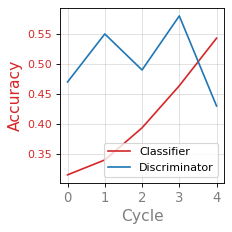

In [14]:
R.plot()